# ***Ownership Cost Forecasting for Pre-Owned Cars***

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

## **Loading Data**

In [ ]:
df = pd.read_csv('pre_owned_cars_synthetic_dataset.csv')

## **Data Analysis**

In [ ]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (1000, 14)

First 5 rows:
   car_id       brand     model  year  kms_driven fuel_type transmission  \
0    1000  Volkswagen      Polo  2005       82097    Petrol       Manual   
1    1001        Ford  EcoSport  2018       18331    Petrol       Manual   
2    1002      Maruti     Dzire  2011      119974    Petrol    Automatic   
3    1003    Mahindra    XUV500  2018       99194    Diesel       Manual   
4    1004      Toyota    Innova  2016      100165       CNG    Automatic   

  owner_type  mileage  engine  power  seats   location  price  
0      First     19.5     998     82      7       Pune   1.50  
1      First     22.6    1197     80      7  Hyderabad   6.72  
2      Third     22.7    1497    100      4    Kolkata   1.50  
3      First     19.6    1497     76      4      Delhi   4.98  
4      First     18.7    1598     47      7      Delhi   4.03  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 col

## **Data Cleaning**

In [ ]:
# Handle missing values (if any)
df.dropna(inplace=True)

# Convert data types
df['price'] = df['price'].astype(float)
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

df = df.drop_duplicates()   # Remove duplicates

# Handle outliers
df = df[(df['price'] > 0.5) & (df['price'] < 15)]
df = df[(df['kms_driven'] > 1000) & (df['kms_driven'] < 200000)]

## **Data Filtering**

In [ ]:
df = df[df['year'] > 2000]    # Filter relevant years

## **Data Grouping**

In [ ]:
# Grouping by brand and transmission
brand_group = df.groupby('brand')
transmission_group = df.groupby('transmission')


## **Aggregations**

In [ ]:
print("\nAverage Price by Brand:")   #avg
print(brand_group['price'].mean().sort_values(ascending=False))

print("\nMedian Mileage by Fuel Type:")  #median
print(df.groupby('fuel_type')['mileage'].median())

print("\nCar Count by Owner Type:")   #count
print(df['owner_type'].value_counts())


Average Price by Brand:
brand
Toyota        4.119732
Hyundai       4.093162
Mahindra      4.080441
Maruti        3.934792
Honda         3.909355
Ford          3.690560
Volkswagen    3.382387
Name: price, dtype: float64

Median Mileage by Fuel Type:
fuel_type
CNG       18.3
Diesel    18.5
Petrol    17.9
Name: mileage, dtype: float64

Car Count by Owner Type:
owner_type
Third     345
Second    330
First     325
Name: count, dtype: int64


## **Data Visualization**

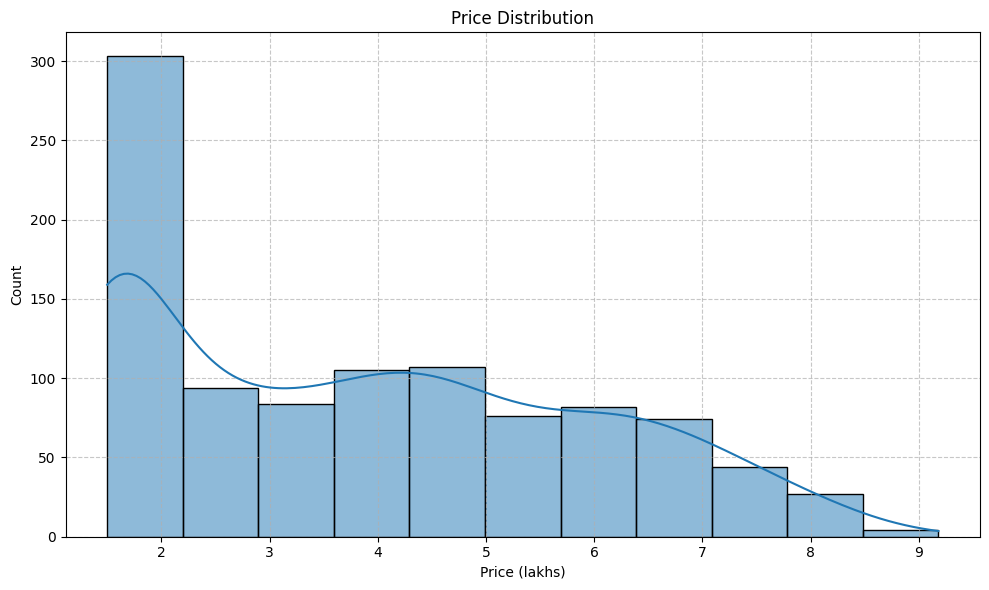

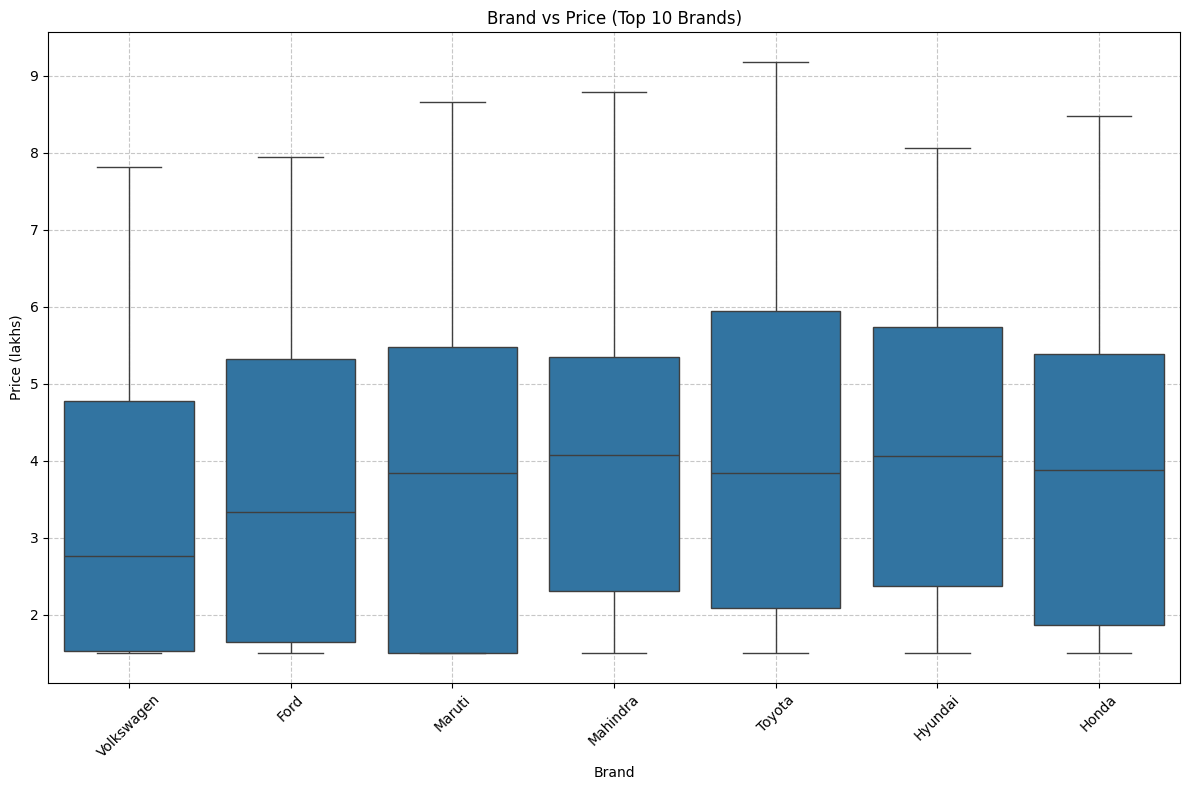

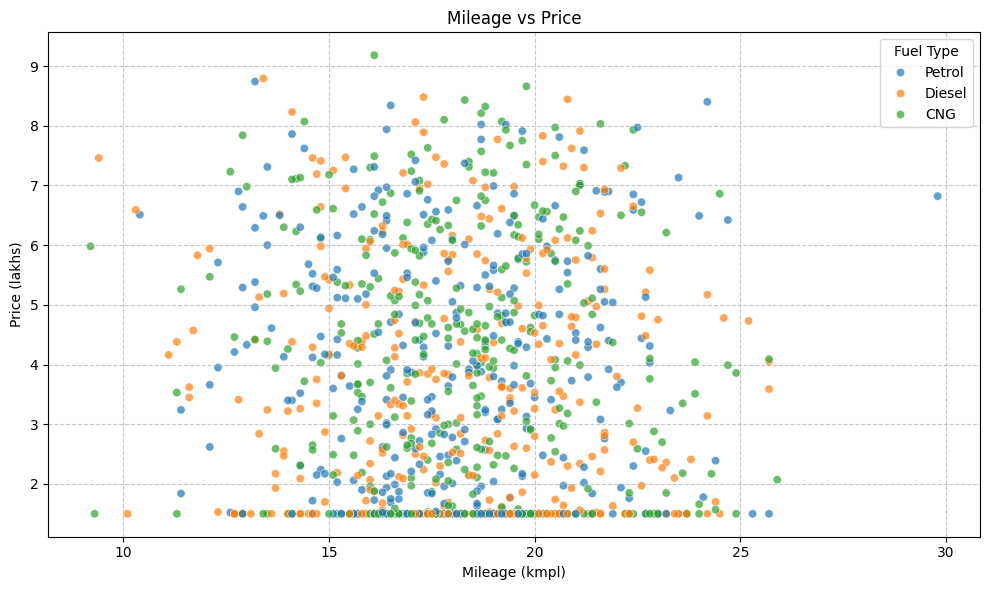

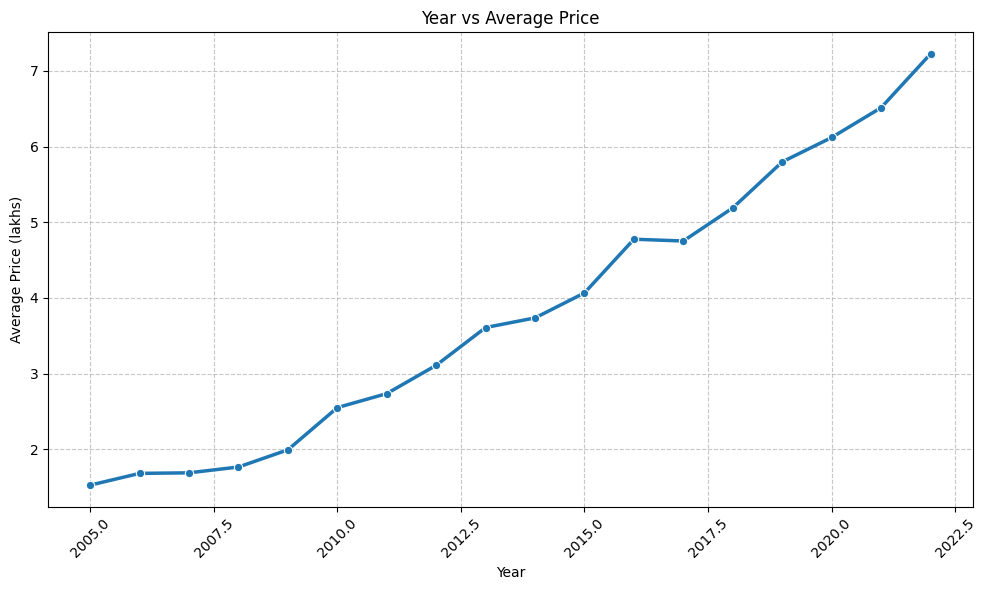

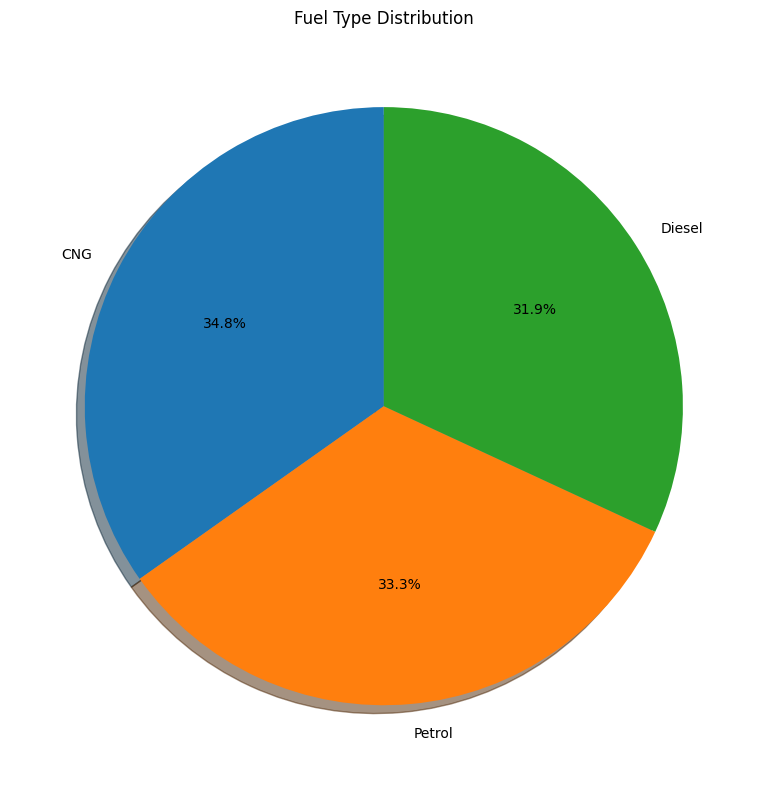

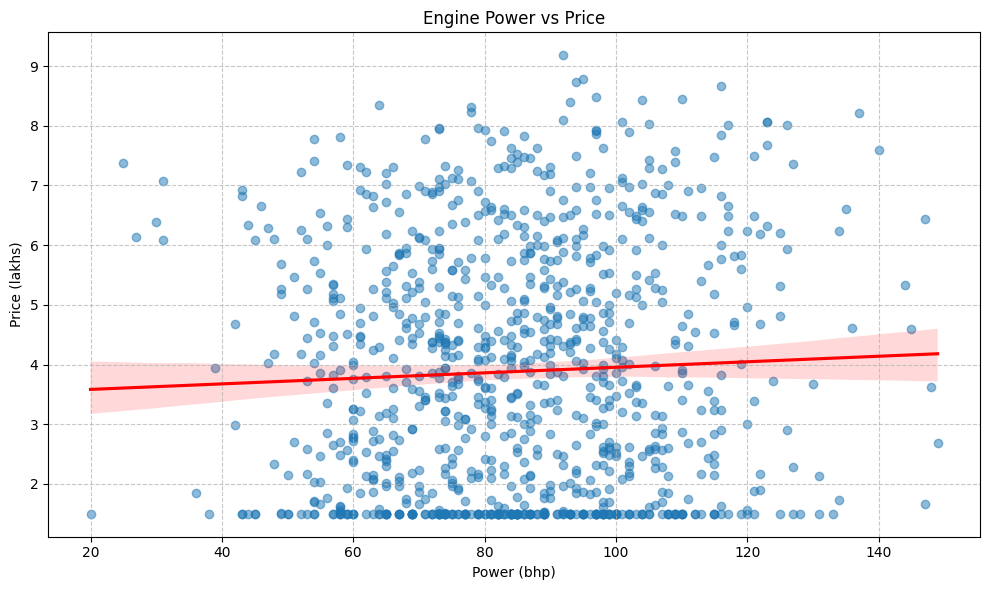

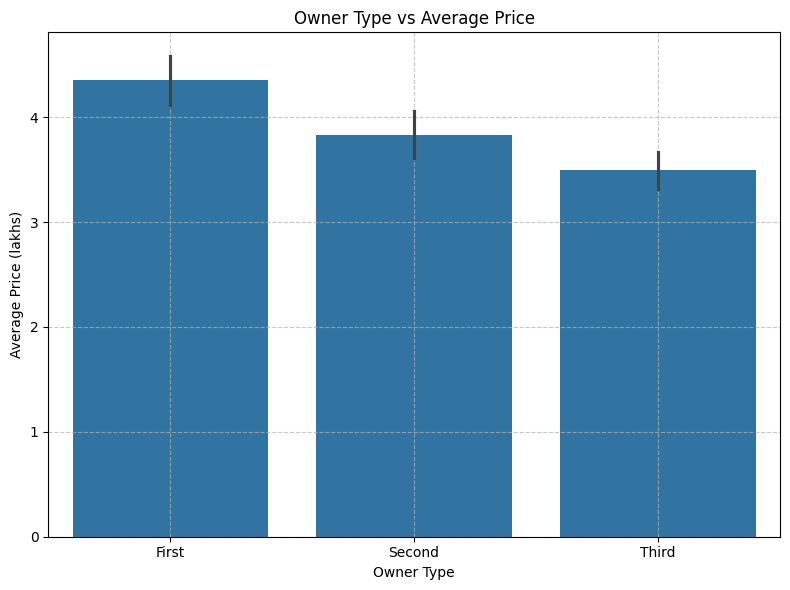

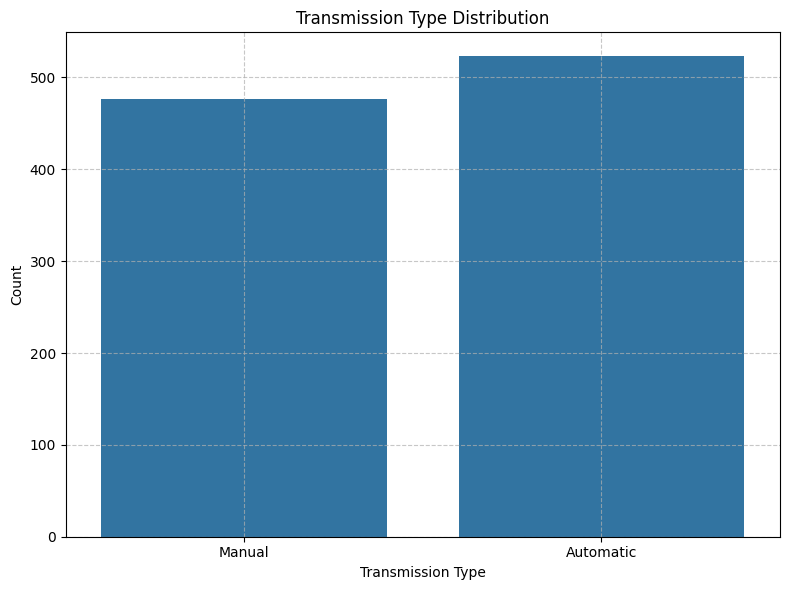

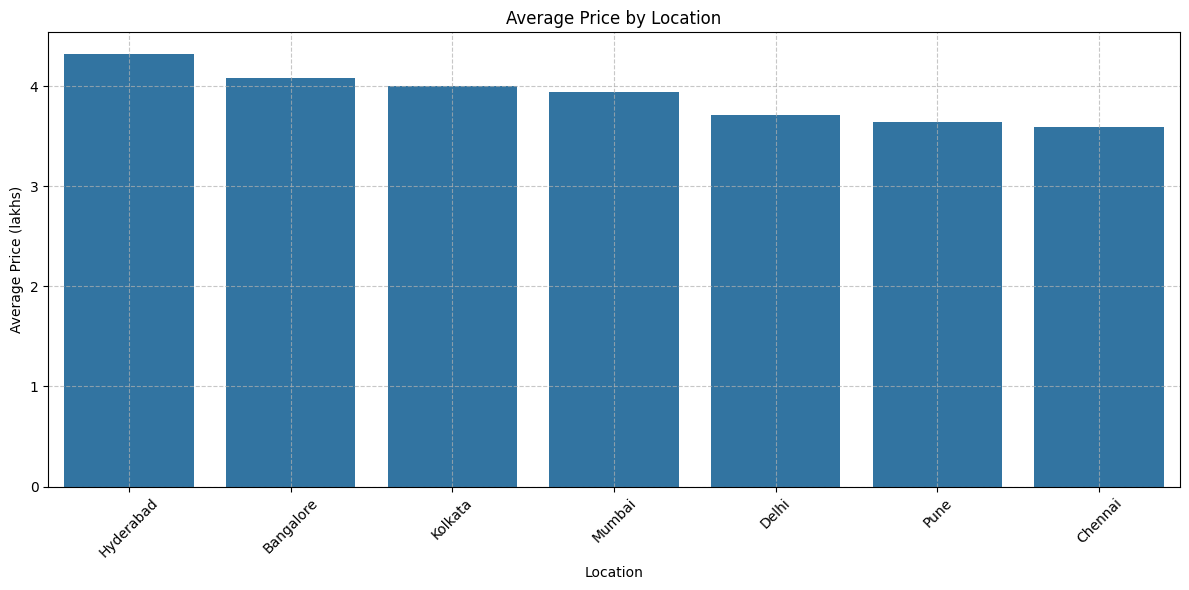

In [ ]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (lakhs)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Brand vs Price
top_brands = df['brand'].value_counts().index[:10]
plt.figure(figsize=(12, 8))
sns.boxplot(x='brand', y='price', data=df[df['brand'].isin(top_brands)])
plt.title('Brand vs Price (Top 10 Brands)')
plt.xlabel('Brand')
plt.ylabel('Price (lakhs)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mileage vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', hue='fuel_type', data=df, alpha=0.7)
plt.title('Mileage vs Price')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Price (lakhs)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

# Year vs Price
plt.figure(figsize=(10, 6))
year_price = df.groupby('year')['price'].mean().reset_index()
sns.lineplot(x='year', y='price', data=year_price, marker='o', linewidth=2.5)
plt.title('Year vs Average Price')
plt.xlabel('Year')
plt.ylabel('Average Price (lakhs)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fuel Type Distribution
plt.figure(figsize=(8, 8))
df['fuel_type'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Fuel Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Engine Power vs Price
plt.figure(figsize=(10, 6))
sns.regplot(x='power', y='price', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
plt.title('Engine Power vs Price')
plt.xlabel('Power (bhp)')
plt.ylabel('Price (lakhs)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Owner Type vs Price
plt.figure(figsize=(8, 6))
sns.barplot(x='owner_type', y='price', data=df, order=['First', 'Second', 'Third'])
plt.title('Owner Type vs Average Price')
plt.xlabel('Owner Type')
plt.ylabel('Average Price (lakhs)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Transmission Type
plt.figure(figsize=(8, 6))
sns.countplot(x='transmission', data=df)
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Additional Visualization: Location Analysis
plt.figure(figsize=(12, 6))
location_price = df.groupby('location')['price'].mean().sort_values(ascending=False)
sns.barplot(x=location_price.index, y=location_price.values)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price (lakhs)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Feature Engineering & Preprocessing**

In [ ]:
# Feature Selection
features = ['brand', 'model', 'year', 'kms_driven', 'fuel_type',
            'transmission', 'owner_type', 'mileage', 'engine', 'power', 'seats']
X = df[features]
y = df['price']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['brand', 'model', 'fuel_type', 'transmission', 'owner_type'])
    ],
    remainder='passthrough'
)

## **Train & Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **Model Building**

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

## **Model Evaluation**

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Performance:")
print('-' * 40)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'R² Score: {r2_score(y_test, y_pred):.4f}')


Model Performance:
----------------------------------------
RMSE: 0.58
R² Score: 0.9235


## **Sample Prediction (Example)**

In [ ]:
import random
import pandas as pd

random_idx = random.randint(0, len(X_test)-1)   #random sampling
sample = X_test.iloc[[random_idx]]
actual = y_test.iloc[random_idx]
predicted = model.predict(sample)[0]

print("\nSample Prediction:")
print(f"Predicted Price: {predicted:.2f} lakhs")
print(f"Actual Price: {actual:.2f} lakhs")
print("\nSample Features:")
print(sample)


Sample Prediction:
Predicted Price: 5.65 lakhs
Actual Price: 5.82 lakhs

Sample Features:
    brand     model  year  kms_driven fuel_type transmission owner_type  \
436  Ford  EcoSport  2015       33409    Petrol    Automatic      First   

     mileage  engine  power  seats  
436     21.3    1497     94      5  
